# FAKE REVIEW NODE EMBEDDING

In [351]:
import os, sys
from copy import deepcopy
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.linear_model import LogisticRegression
from torch.utils.data import DataLoader
import argparse

from dgl.sampling import node2vec_random_walk
import torch as th
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [352]:
print(f"Torch version: {th.__version__}.  CUDA version: {th.version.cuda}")

Torch version: 1.12.1+cu113.  CUDA version: 11.3


In [353]:
dgl_version = f"dgl-cu{th.version.cuda.replace('.', '')}==0.7.2"
dgl_version

'dgl-cu113==0.7.2'

In [354]:
# Follow instructions at https://www.dgl.ai/pages/start.html
!{sys.executable} -m pip install {dgl_version} -f https://data.dgl.ai/wheels/repo.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels/repo.html


In [355]:
os.environ['DGLBACKEND'] = 'pytorch'
import dgl
from dgl import function as fn

In [356]:
from dgl.dataloading.pytorch import NodeDataLoader
device = th.device('cuda' if th.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [357]:
# importing all necessary libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import networkx as nx
import stellargraph as sg
from stellargraph import StellarGraph
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from node2vec import Node2Vec as n2v
sns.set()

%matplotlib inline

In [358]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import statistics
import math
import os
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
pd.set_option('max_colwidth', 800)


#importing Libraies
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import collections
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [359]:
#loading dataset
df=pd.read_csv('/content/newdataset.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [360]:
df.shape

(1470, 35)

In [361]:
d = []
for i in range(1470):
    s = i+1
    d.append(s)

In [362]:
d

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [363]:
df.insert(0, 'Index', d)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,No
2,3,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Yes
3,4,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,No
4,5,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,No


In [364]:
df.shape

(1470, 36)

In [365]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [366]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,307,32,Travel_Rarely,906,Sales,7,3,Life Sciences,1,420,...,80,1,13,3,2,13,8,4,8,No
1,756,45,Travel_Rarely,1234,Sales,11,2,Life Sciences,1,1045,...,80,1,26,4,4,9,3,1,1,No
2,1347,45,Travel_Rarely,556,Research & Development,25,2,Life Sciences,1,1888,...,80,2,10,2,2,9,8,3,8,No
3,1367,39,Non-Travel,1251,Sales,21,4,Life Sciences,1,1929,...,80,1,10,1,3,3,2,1,2,No
4,533,47,Travel_Rarely,703,Sales,14,4,Marketing,1,728,...,80,0,20,2,3,7,7,1,7,No


In [367]:
df.isnull().sum()

Index                       0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54d35d3450>,
      dtype=object)

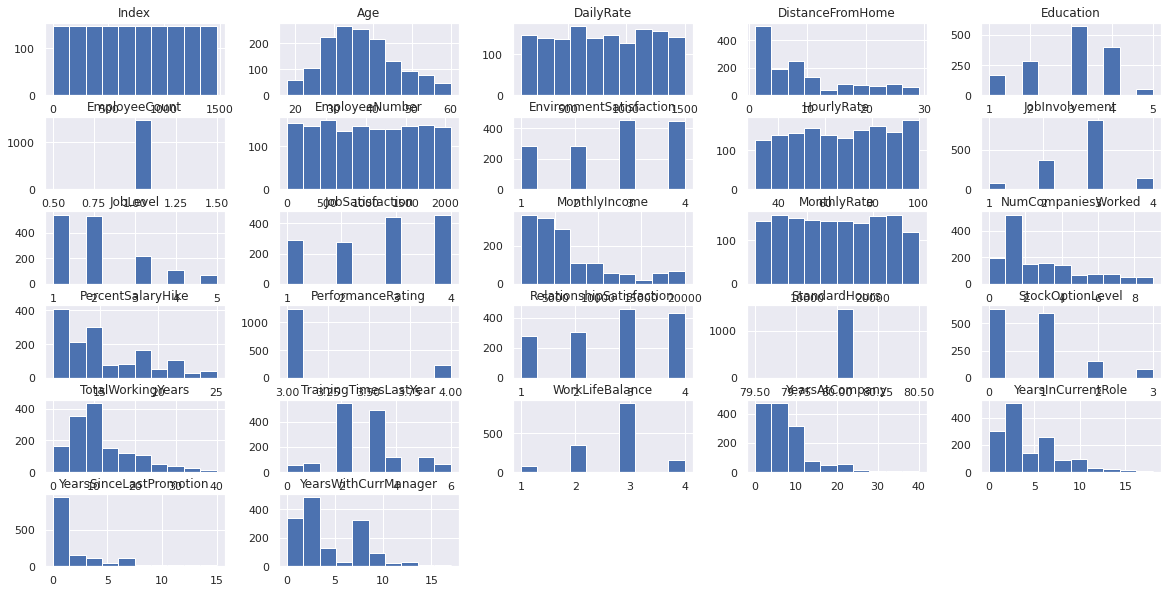

In [368]:
df.hist(figsize=(20,10))

In [369]:
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,307,32,Travel_Rarely,906,Sales,7,3,Life Sciences,1,420,...,80,1,13,3,2,13,8,4,8,No
1,756,45,Travel_Rarely,1234,Sales,11,2,Life Sciences,1,1045,...,80,1,26,4,4,9,3,1,1,No
2,1347,45,Travel_Rarely,556,Research & Development,25,2,Life Sciences,1,1888,...,80,2,10,2,2,9,8,3,8,No
3,1367,39,Non-Travel,1251,Sales,21,4,Life Sciences,1,1929,...,80,1,10,1,3,3,2,1,2,No
4,533,47,Travel_Rarely,703,Sales,14,4,Marketing,1,728,...,80,0,20,2,3,7,7,1,7,No


In [370]:
feat_cat=[feature for feature in df.columns if df[feature].dtype =='O']
feat_cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Attrition']

In [371]:
ordinal_label=df['BusinessTravel'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}

In [372]:
df['BusinessTravel']=df['BusinessTravel'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,307,32,0,906,Sales,7,3,Life Sciences,1,420,...,80,1,13,3,2,13,8,4,8,No
1,756,45,0,1234,Sales,11,2,Life Sciences,1,1045,...,80,1,26,4,4,9,3,1,1,No
2,1347,45,0,556,Research & Development,25,2,Life Sciences,1,1888,...,80,2,10,2,2,9,8,3,8,No
3,1367,39,2,1251,Sales,21,4,Life Sciences,1,1929,...,80,1,10,1,3,3,2,1,2,No
4,533,47,0,703,Sales,14,4,Marketing,1,728,...,80,0,20,2,3,7,7,1,7,No


In [373]:
ordinal_label=df['Department'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Research & Development': 0, 'Sales': 1, 'Human Resources': 2}

In [374]:
df['Department']=df['Department'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,307,32,0,906,1,7,3,Life Sciences,1,420,...,80,1,13,3,2,13,8,4,8,No
1,756,45,0,1234,1,11,2,Life Sciences,1,1045,...,80,1,26,4,4,9,3,1,1,No
2,1347,45,0,556,0,25,2,Life Sciences,1,1888,...,80,2,10,2,2,9,8,3,8,No
3,1367,39,2,1251,1,21,4,Life Sciences,1,1929,...,80,1,10,1,3,3,2,1,2,No
4,533,47,0,703,1,14,4,Marketing,1,728,...,80,0,20,2,3,7,7,1,7,No


In [375]:
ordinal_label=df['EducationField'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Life Sciences': 0,
 'Medical': 1,
 'Marketing': 2,
 'Technical Degree': 3,
 'Other': 4,
 'Human Resources': 5}

In [376]:
df['EducationField']=df['EducationField'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,307,32,0,906,1,7,3,0,1,420,...,80,1,13,3,2,13,8,4,8,No
1,756,45,0,1234,1,11,2,0,1,1045,...,80,1,26,4,4,9,3,1,1,No
2,1347,45,0,556,0,25,2,0,1,1888,...,80,2,10,2,2,9,8,3,8,No
3,1367,39,2,1251,1,21,4,0,1,1929,...,80,1,10,1,3,3,2,1,2,No
4,533,47,0,703,1,14,4,2,1,728,...,80,0,20,2,3,7,7,1,7,No


In [377]:
ordinal_label=df['Gender'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Male': 0, 'Female': 1}

In [378]:
df['Gender']=df['Gender'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,307,32,0,906,1,7,3,0,1,420,...,80,1,13,3,2,13,8,4,8,No
1,756,45,0,1234,1,11,2,0,1,1045,...,80,1,26,4,4,9,3,1,1,No
2,1347,45,0,556,0,25,2,0,1,1888,...,80,2,10,2,2,9,8,3,8,No
3,1367,39,2,1251,1,21,4,0,1,1929,...,80,1,10,1,3,3,2,1,2,No
4,533,47,0,703,1,14,4,2,1,728,...,80,0,20,2,3,7,7,1,7,No


In [379]:
ordinal_label=df['JobRole'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Sales Executive': 0,
 'Research Scientist': 1,
 'Laboratory Technician': 2,
 'Manufacturing Director': 3,
 'Healthcare Representative': 4,
 'Manager': 5,
 'Sales Representative': 6,
 'Research Director': 7,
 'Human Resources': 8}

In [380]:
df['JobRole']=df['JobRole'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,307,32,0,906,1,7,3,0,1,420,...,80,1,13,3,2,13,8,4,8,No
1,756,45,0,1234,1,11,2,0,1,1045,...,80,1,26,4,4,9,3,1,1,No
2,1347,45,0,556,0,25,2,0,1,1888,...,80,2,10,2,2,9,8,3,8,No
3,1367,39,2,1251,1,21,4,0,1,1929,...,80,1,10,1,3,3,2,1,2,No
4,533,47,0,703,1,14,4,2,1,728,...,80,0,20,2,3,7,7,1,7,No


In [381]:
ordinal_label=df['MaritalStatus'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Married': 0, 'Single': 1, 'Divorced': 2}

In [382]:
df['MaritalStatus']=df['MaritalStatus'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,307,32,0,906,1,7,3,0,1,420,...,80,1,13,3,2,13,8,4,8,No
1,756,45,0,1234,1,11,2,0,1,1045,...,80,1,26,4,4,9,3,1,1,No
2,1347,45,0,556,0,25,2,0,1,1888,...,80,2,10,2,2,9,8,3,8,No
3,1367,39,2,1251,1,21,4,0,1,1929,...,80,1,10,1,3,3,2,1,2,No
4,533,47,0,703,1,14,4,2,1,728,...,80,0,20,2,3,7,7,1,7,No


In [383]:
ordinal_label=df['Over18'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Y': 0}

In [384]:
df['Over18']=df['Over18'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,307,32,0,906,1,7,3,0,1,420,...,80,1,13,3,2,13,8,4,8,No
1,756,45,0,1234,1,11,2,0,1,1045,...,80,1,26,4,4,9,3,1,1,No
2,1347,45,0,556,0,25,2,0,1,1888,...,80,2,10,2,2,9,8,3,8,No
3,1367,39,2,1251,1,21,4,0,1,1929,...,80,1,10,1,3,3,2,1,2,No
4,533,47,0,703,1,14,4,2,1,728,...,80,0,20,2,3,7,7,1,7,No


In [385]:
ordinal_label=df['OverTime'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'No': 0, 'Yes': 1}

In [386]:
df['OverTime']=df['OverTime'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,307,32,0,906,1,7,3,0,1,420,...,80,1,13,3,2,13,8,4,8,No
1,756,45,0,1234,1,11,2,0,1,1045,...,80,1,26,4,4,9,3,1,1,No
2,1347,45,0,556,0,25,2,0,1,1888,...,80,2,10,2,2,9,8,3,8,No
3,1367,39,2,1251,1,21,4,0,1,1929,...,80,1,10,1,3,3,2,1,2,No
4,533,47,0,703,1,14,4,2,1,728,...,80,0,20,2,3,7,7,1,7,No


In [387]:
ordinal_label=df['Attrition'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'No': 0, 'Yes': 1}

In [388]:
df['Attrition']=df['Attrition'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,307,32,0,906,1,7,3,0,1,420,...,80,1,13,3,2,13,8,4,8,0
1,756,45,0,1234,1,11,2,0,1,1045,...,80,1,26,4,4,9,3,1,1,0
2,1347,45,0,556,0,25,2,0,1,1888,...,80,2,10,2,2,9,8,3,8,0
3,1367,39,2,1251,1,21,4,0,1,1929,...,80,1,10,1,3,3,2,1,2,0
4,533,47,0,703,1,14,4,2,1,728,...,80,0,20,2,3,7,7,1,7,0


In [389]:
df1 = df.sort_values(by=['Index'], ascending=True)
df1.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
553,1,41,0,1102,1,1,2,0,1,1,...,80,0,8,0,1,6,4,0,5,1
1089,2,49,1,279,0,8,1,0,1,2,...,80,1,10,3,3,10,7,1,7,0
1183,3,37,0,1373,0,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,1
176,4,33,1,1392,0,3,4,0,1,5,...,80,0,8,3,3,8,7,3,0,0
711,5,27,0,591,0,2,1,1,1,7,...,80,1,6,3,3,2,2,2,2,0


In [390]:
df1.reset_index(drop=True, inplace=True)

In [391]:
df1.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,0,1102,1,1,2,0,1,1,...,80,0,8,0,1,6,4,0,5,1
1,2,49,1,279,0,8,1,0,1,2,...,80,1,10,3,3,10,7,1,7,0
2,3,37,0,1373,0,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,1
3,4,33,1,1392,0,3,4,0,1,5,...,80,0,8,3,3,8,7,3,0,0
4,5,27,0,591,0,2,1,1,1,7,...,80,1,6,3,3,2,2,2,2,0


In [392]:
s_array = df1['Attrition'].to_numpy()
s_array

array([1, 0, 1, ..., 0, 0, 0])

In [393]:
df1.drop(['Index', 'Attrition'], axis=1, inplace=True)
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,1,1,2,0,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,0,8,1,0,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,0,1373,0,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,0,3,4,0,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,0,2,1,1,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [394]:
r = df1.to_numpy()
r

array([[  41,    0, 1102, ...,    4,    0,    5],
       [  49,    1,  279, ...,    7,    1,    7],
       [  37,    0, 1373, ...,    0,    0,    0],
       ...,
       [  27,    0,  155, ...,    2,    0,    3],
       [  49,    1, 1023, ...,    6,    0,    8],
       [  34,    0,  628, ...,    3,    1,    2]])

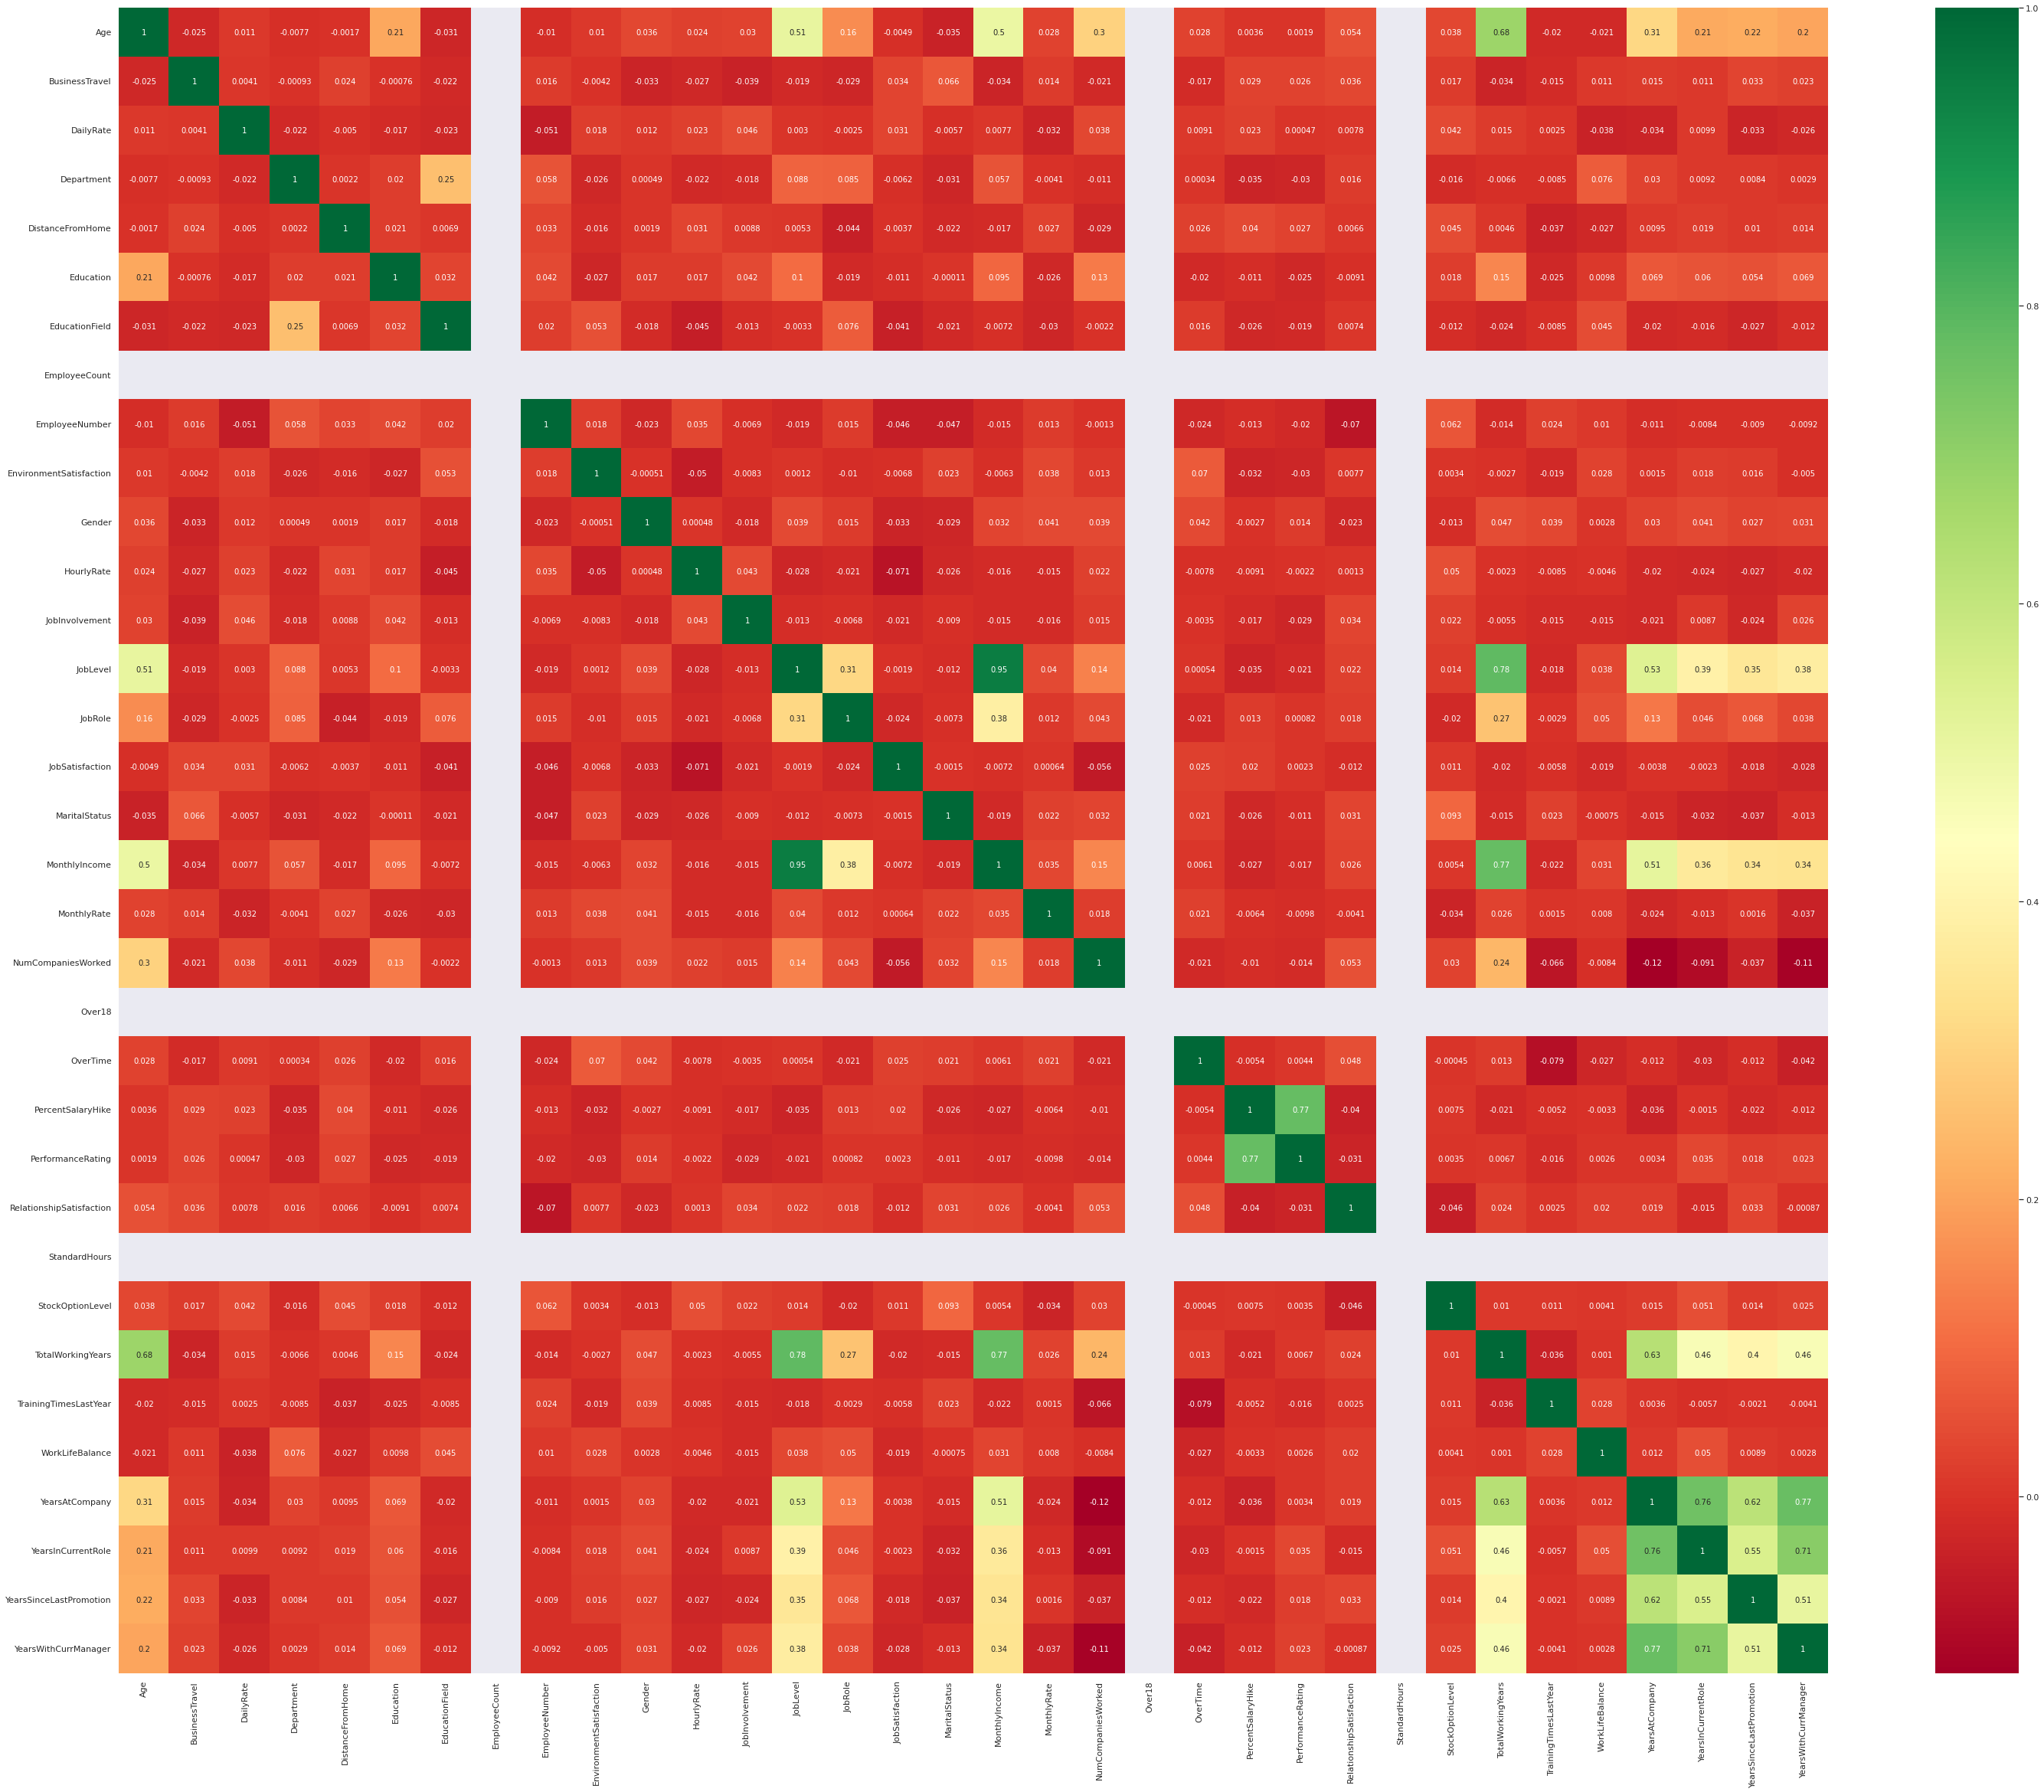

In [395]:
plt.figure(figsize = (50,40))
sns.heatmap(df1.corr(), cmap = "RdYlGn", annot = True)

In [396]:
scale_data=[feature for feature in df1.columns]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[scale_data]=scaler.fit_transform(df1[scale_data])
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.0,0.715820,0.5,0.000000,0.25,0.0,0.0,0.000000,0.333333,...,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.0,0.250000,0.00,0.0,0.0,0.000484,0.666667,...,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.0,0.909807,0.0,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.0,0.071429,0.75,0.0,0.0,0.001935,1.000000,...,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.0,0.350036,0.0,0.035714,0.00,0.2,0.0,0.002903,0.000000,...,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [397]:
u3 = df1.copy()
u3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.0,0.715820,0.5,0.000000,0.25,0.0,0.0,0.000000,0.333333,...,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.0,0.250000,0.00,0.0,0.0,0.000484,0.666667,...,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.0,0.909807,0.0,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.0,0.071429,0.75,0.0,0.0,0.001935,1.000000,...,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.0,0.350036,0.0,0.035714,0.00,0.2,0.0,0.002903,0.000000,...,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [398]:
p = u3.to_numpy()
p

array([[0.54761905, 0.        , 0.71581961, ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.5       , 0.12670007, ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 0.        , 0.90980673, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 0.        , 0.03793844, ..., 0.11111111, 0.        ,
        0.17647059],
       [0.73809524, 0.5       , 0.65926986, ..., 0.33333333, 0.        ,
        0.47058824],
       [0.38095238, 0.        , 0.37652112, ..., 0.16666667, 0.06666667,
        0.11764706]])

In [399]:
from scipy.spatial.distance import cdist
s = cdist(u3, u3, 'euclid')
s

array([[0.        , 2.90106829, 2.0829746 , ..., 2.62496882, 2.61751638,
        2.45157261],
       [2.90106829, 0.        , 2.62039624, ..., 2.25428594, 1.97556032,
        2.42289955],
       [2.0829746 , 2.62039624, 0.        , ..., 2.40266495, 2.26773337,
        2.14776924],
       ...,
       [2.62496882, 2.25428594, 2.40266495, ..., 0.        , 2.40602545,
        1.82206588],
       [2.61751638, 1.97556032, 2.26773337, ..., 2.40602545, 0.        ,
        1.90258654],
       [2.45157261, 2.42289955, 2.14776924, ..., 1.82206588, 1.90258654,
        0.        ]])

In [400]:
X1=pd.DataFrame(s)
X1

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.000000,2.901068,2.082975,1.990395,2.460054,2.198560,2.346969,2.728009,2.867858,2.298548,...,2.587961,2.709682,2.425933,2.863639,2.776033,2.668620,2.792917,2.624969,2.617516,2.451573
1,2.901068,0.000000,2.620396,2.437835,2.031625,1.949957,2.524119,1.983110,1.535105,2.237889,...,2.665499,2.725383,2.797464,2.212214,2.611384,2.124897,2.130945,2.254286,1.975560,2.422900
2,2.082975,2.620396,0.000000,2.054726,2.215463,1.854551,2.341530,2.179679,2.499158,2.092955,...,2.528722,2.308769,2.875645,2.480970,2.451258,2.316897,2.397818,2.402665,2.267733,2.147769
3,1.990395,2.437835,2.054726,0.000000,2.364184,1.820953,2.267287,2.587775,2.521258,2.253481,...,2.337924,2.612870,2.651273,2.587804,2.163003,2.277175,2.522617,2.586033,2.155023,2.322519
4,2.460054,2.031625,2.215463,2.364184,0.000000,2.004433,2.729116,2.464900,2.535479,1.945049,...,2.663368,2.698514,2.750771,2.331514,2.483042,1.922886,2.106373,2.491555,2.151672,1.995037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2.668620,2.124897,2.316897,2.277175,1.922886,1.779482,2.778341,2.144658,2.050492,1.768427,...,2.167462,2.238704,2.118746,1.859529,2.096507,0.000000,1.856933,2.201272,1.655297,1.465485
1466,2.792917,2.130945,2.397818,2.522617,2.106373,2.204001,2.724045,2.475431,2.191774,2.034133,...,2.105197,2.029442,2.221994,1.925722,2.271316,1.856933,0.000000,2.373096,1.742307,1.708765
1467,2.624969,2.254286,2.402665,2.586033,2.491555,2.447270,2.190197,2.380420,2.220935,2.538526,...,2.518748,2.492175,2.743540,1.985534,2.778090,2.201272,2.373096,0.000000,2.406025,1.822066
1468,2.617516,1.975560,2.267733,2.155023,2.151672,1.676630,2.847753,2.567784,2.208964,2.129168,...,2.012013,2.185232,2.297033,1.743389,1.977298,1.655297,1.742307,2.406025,0.000000,1.902587


In [401]:
# taking average
y = np.average(X1)
y

2.301521854077962

In [402]:
adjmat_df=X1.copy()

In [403]:
adjmat_df[adjmat_df < y]=0
adjmat_df[adjmat_df >= y]=1

In [404]:
adjmat_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [405]:
q = adjmat_df.to_numpy()
q

array([[0., 1., 0., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [406]:
# SOURCE : https://github.com/dmlc/dgl/issues/3364
src, dst = np.nonzero(q)

In [407]:
src

array([   0,    0,    0, ..., 1469, 1469, 1469])

In [408]:
dst

array([   1,    4,    6, ..., 1450, 1461, 1464])

In [409]:
g = dgl.graph((src, dst))

In [410]:
n_nodes = g.num_nodes()
n_nodes

1470

In [411]:
nodes = g.nodes()
nodes

tensor([   0,    1,    2,  ..., 1467, 1468, 1469])

In [412]:
n_nodes1 = g.number_of_nodes()
n_nodes1

1470

In [413]:
g.ndata['feat'] = torch.tensor(p)
g.ndata['feat'] 

tensor([[0.5476, 0.0000, 0.7158,  ..., 0.2222, 0.0000, 0.2941],
        [0.7381, 0.5000, 0.1267,  ..., 0.3889, 0.0667, 0.4118],
        [0.4524, 0.0000, 0.9098,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.2143, 0.0000, 0.0379,  ..., 0.1111, 0.0000, 0.1765],
        [0.7381, 0.5000, 0.6593,  ..., 0.3333, 0.0000, 0.4706],
        [0.3810, 0.0000, 0.3765,  ..., 0.1667, 0.0667, 0.1176]],
       dtype=torch.float64)

In [414]:
n_train = int(n_nodes1 * 0.6)
n_val = int(n_nodes1 * 0.2)

In [415]:
train_mask = torch.zeros(n_nodes, dtype=torch.bool)
len(train_mask)
train_mask

tensor([False, False, False,  ..., False, False, False])

In [416]:
val_mask = torch.zeros(n_nodes, dtype=torch.bool)
len(val_mask)
val_mask

tensor([False, False, False,  ..., False, False, False])

In [417]:
test_mask = torch.zeros(n_nodes, dtype=torch.bool)
len(test_mask)
test_mask

tensor([False, False, False,  ..., False, False, False])

In [418]:
train_mask[:n_train] = True
val_mask[n_train:n_train + n_val] = True
test_mask[n_train + n_val:] = True

In [419]:
g.ndata['train_mask'] = train_mask
g.ndata['val_mask'] = val_mask
g.ndata['test_mask'] = test_mask

In [420]:
t1 = torch.tensor(s_array)
t1

tensor([1, 0, 1,  ..., 0, 0, 0])

In [421]:
g.ndata["label"] =t1

In [422]:
label = g.ndata["label"]

In [423]:
label[train_mask]

tensor([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [424]:
label[val_mask]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0])

In [425]:
label[test_mask]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0])

In [426]:
train_mask

tensor([ True,  True,  True,  ..., False, False, False])

In [427]:
val_mask

tensor([False, False, False,  ..., False, False, False])

In [428]:
test_mask

tensor([False, False, False,  ...,  True,  True,  True])

In [429]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score
import seaborn as sns

In [430]:
clf = LogisticRegression()
clf.fit(g.ndata['feat'][train_mask], label[train_mask])

#y_hat_val_lr = clf.predict_proba(X_kbest_features[val_mask,:])
y_val_lr = clf.predict(g.ndata['feat'][test_mask])
accuracy_score(label[test_mask], y_val_lr)

0.8741496598639455

In [431]:
clf_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
clf_balanced.fit(g.ndata['feat'][train_mask], label[train_mask])

y_val_lrb = clf_balanced.predict(g.ndata['feat'][test_mask])
accuracy_score(label[test_mask], y_val_lrb)

0.6394557823129252

In [432]:
rf = RandomForestClassifier(n_estimators=400)
rf.fit(g.ndata['feat'][train_mask,:], label[train_mask])

y_val_rf = rf.predict(g.ndata['feat'][test_mask,:])
accuracy_score(label[test_mask], y_val_rf)

0.8775510204081632

In [433]:
gb = GradientBoostingClassifier(n_estimators=400)
gb.fit(g.ndata['feat'][train_mask,:], label[train_mask])

y_val_gb =gb.predict(g.ndata['feat'][test_mask,:])
accuracy_score(label[test_mask], y_val_gb)

0.8775510204081632

In [434]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb.fit(g.ndata['feat'][train_mask,:], label[train_mask])

y_val_lgb =lgb.predict(g.ndata['feat'][test_mask,:])
accuracy_score(label[test_mask], y_val_lgb)


0.8979591836734694

In [435]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=400, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
xgbc.fit(g.ndata['feat'][train_mask,:], label[train_mask])

y_val_xgbc =xgbc.predict(g.ndata['feat'][test_mask,:])
accuracy_score(label[test_mask], y_val_xgbc)

0.8945578231292517

### CROSS VALIDATION

In [436]:
X = g.ndata['feat']
Y = label

In [437]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
kf = KFold(n_splits=10)

In [438]:
from sklearn.svm import LinearSVC
models = LinearSVC()
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X,Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    models.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(models.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8673469387755102
              precision    recall  f1-score   support

           0       0.87      0.98      0.93      1233
           1       0.75      0.27      0.39       237

    accuracy                           0.87      1470
   macro avg       0.81      0.62      0.66      1470
weighted avg       0.85      0.87      0.84      1470

Confusion matrix:  [[1212   21]
 [ 174   63]]


In [439]:
from sklearn.linear_model import PassiveAggressiveClassifier
pag=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X,Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    pag.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(pag.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8156462585034013
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1233
           1       0.41      0.31      0.35       237

    accuracy                           0.82      1470
   macro avg       0.64      0.61      0.62      1470
weighted avg       0.80      0.82      0.81      1470

Confusion matrix:  [[1125  108]
 [ 163   74]]


In [440]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000) 
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X,Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lr.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lr.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8721088435374149
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1233
           1       0.76      0.30      0.43       237

    accuracy                           0.87      1470
   macro avg       0.82      0.64      0.68      1470
weighted avg       0.86      0.87      0.85      1470

Confusion matrix:  [[1210   23]
 [ 165   72]]


In [441]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X,Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    rf.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(rf.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8537414965986394
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.73      0.15      0.25       237

    accuracy                           0.85      1470
   macro avg       0.79      0.57      0.58      1470
weighted avg       0.84      0.85      0.81      1470

Confusion matrix:  [[1220   13]
 [ 202   35]]


In [442]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X,Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    gb.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(gb.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1233
           1       0.62      0.35      0.45       237

    accuracy                           0.86      1470
   macro avg       0.75      0.65      0.68      1470
weighted avg       0.84      0.86      0.84      1470

Confusion matrix:  [[1182   51]
 [ 154   83]]


In [443]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=400, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X,Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    xgbc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(xgbc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8653061224489796
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1233
           1       0.66      0.34      0.45       237

    accuracy                           0.87      1470
   macro avg       0.77      0.65      0.69      1470
weighted avg       0.85      0.87      0.85      1470

Confusion matrix:  [[1191   42]
 [ 156   81]]


In [444]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X,Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lgb.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lgb.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.863265306122449
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1233
           1       0.66      0.31      0.42       237

    accuracy                           0.86      1470
   macro avg       0.77      0.64      0.67      1470
weighted avg       0.84      0.86      0.84      1470

Confusion matrix:  [[1196   37]
 [ 164   73]]


In [445]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=400, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X,Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    xgbc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(xgbc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8653061224489796
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1233
           1       0.66      0.34      0.45       237

    accuracy                           0.87      1470
   macro avg       0.77      0.65      0.69      1470
weighted avg       0.85      0.87      0.85      1470

Confusion matrix:  [[1191   42]
 [ 156   81]]
